In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cabbage_df = pd.read_excel("data-files/양배추_가격_2.xlsx", engine='openpyxl')

In [3]:
cabbage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21414 entries, 0 to 21413
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       21414 non-null  object 
 1   거래단위       21414 non-null  object 
 2   총거래금액      21414 non-null  int64  
 3   도매시장       21414 non-null  object 
 4   도매법인       21414 non-null  object 
 5   품목         21414 non-null  object 
 6   품종         21414 non-null  object 
 7   산지-광역시도    21414 non-null  object 
 8   산지-시군구     21414 non-null  object 
 9   등급         21414 non-null  object 
 10  단위_무게(kg)  21414 non-null  int64  
 11  1kg_물량     21414 non-null  int64  
 12  1kg_평균가격   21414 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 2.1+ MB


In [4]:
cabbage_df['DATE'] = pd.to_datetime(cabbage_df['DATE'], format='%Y-%m')

In [5]:
cabbage_df['산지-시군구'].unique()

array(['서산시', '무안군', '정선군', '태안군', '당진시', '삼척시', '문경시', '강릉시', '횡성군',
       '태백시', '신안군', '송파구', '춘천시', '평창군', '고창군', '해남군', '중국', '경기도',
       '장흥군', '구미시', '달성군', '상주시', '제주시', '중구', '기장군', '-', '영양군',
       '서울특별시', '강서구', '부산광역시', '괴산군', '진도군', '인제군', '거제시', '양양군', '계양구',
       '봉화군', '청송군', '동해시', '충주시', '강원도', '포항시', '청원군', '진천군', '완도군',
       '제천시', '홍천군', '양구군', '영월군', '예산군', '의령군', '진해시', '안동시', '서귀포시',
       '김천시', '김해시', '평택시', '달서구', '장수군', '군위군', '경산시', '인천광역시', '영광군',
       '단양군', '구리시', '철원군', '나주시', '남원시', '예천군', '청주시', '보은군', '원주시',
       '영덕군', '대구광역시', '홍성군', '고령군', '여주군', '고양시', '전라남도', '함안군', '광명시',
       '창녕군', '화성시', '논산시', '울산광역시', '아산시', '이천시', '남동구', '의성군', '영암군',
       '경주시', '남해군', '김제시', '금산군', '용인시', '담양군', '밀양시', '완주군', '보성군',
       '부평구', '광주광역시', '청도군', '양평군', '부안군', '제주도', '북제주군', '합천군', '남제주군',
       '산청군', '진주시', '사상구', '함평군', '양산시', '북구', '강진군', '광산구', '부여군',
       '울주군', '고흥군', '순천시', '화천군', '속초시', '고성군', '증평군', '해운대구', '동구',
       '서

In [6]:
cabbage_df['도매시장'].unique()

array(['서울가락도매', '인천삼산도매', '안산도매시장', '춘천도매시장', '대구북부도매', '부산반여도매',
       '강릉도매시장', '충주도매시장', '포항도매시장', '광주서부도매', '안양도매시장', '순천도매시장',
       '청주도매시장', '창원내서도매시장', '인천구월도매', '울산도매시장', '원주도매시장', '광주각화도매',
       '창원팔용도매시장', '전주도매시장', '구리도매시장', '수원도매시장', '부산엄궁도매', '구미도매시장',
       '서울강서도매', '진주도매시장', '천안도매시장', '대전오정도매', '정읍도매시장', '대전노은도매',
       '익산도매시장', '안동도매시장'], dtype=object)

In [7]:
cabbage_df['산지-광역시도'].unique()

array(['충청남도', '전라남도', '강원도', '경상북도', '충남', '전남', '서울', '전라북도', '중국',
       '경기도', '대구광역시', '제주도', '부산', '강원', '부산광역시', '-', '서울특별시', '충청북도',
       '경상남도', '인천', '충북', '경북', '전북', '경남', '제주', '경기', '인천광역시', '울산광역시',
       '대구', '광주광역시', '광주', '울산', '대전광역시', '대전', '뉴질랜드', '수입산'],
      dtype=object)

In [8]:
# 산지-광역시도 기준 디렉토리

region_sum = {
    '충남': '충청남도', 
    '강원': '강원도', 
    '제주':'제주도', 
    '전남' : '전라남도',
    '전북' : '전라북도', 
    '강원' : '강원도',
    '충북' : '충청북도',
    '부산' : '부산광역시',
    '경남' : '경상남도',
    '서울' : '서울특별시',
    '광주' : '광주광역시', 
    '경북' : '경상북도',
    '경기' : '경기도',
    '인천' : '인천광역시',
    '대구' : '대구광역시',
    '울산' : '울산광역시',
    '대전' : '대전광역시'
}

In [9]:
# 시각화 하기 위해서 1kg_평균가격, 1kg_물량, 도매시장, 산지-광역시도 컬럼만 가져오기

cabbage_df['1kg_평균가격'] = pd.to_numeric(cabbage_df['1kg_평균가격'], errors='coerce')
cabbage_df['1kg_물량'] = pd.to_numeric(cabbage_df['1kg_물량'], errors='coerce')


cabbage_df_cleaned = cabbage_df.dropna(subset=['1kg_평균가격', '1kg_물량', '도매시장', '산지-광역시도'])

# 우리나라 지역이 아닌 곳들 제거
cabbage_df_cleaned = cabbage_df_cleaned[~cabbage_df_cleaned['산지-광역시도'].isin(['뉴질랜드', '수입산', '중국','-'])]


# 가중치
cabbage_df_cleaned['weighted_price'] = (
    cabbage_df_cleaned['1kg_평균가격'] * cabbage_df_cleaned['1kg_물량']
)


# 산지-광역시도 데이터를 위에서 만든 기준 디렉토리를 이용하여 변경
# 충북 = 충청북도, 충남 = 충청남도 등

cabbage_df_cleaned['산지-광역시도'] = cabbage_df_cleaned['산지-광역시도'].replace(region_sum)


# 도매시장별로 그룹화
weighted_avg_market = (
    cabbage_df_cleaned.groupby(['DATE', '도매시장']).apply(
        lambda g: g['weighted_price'].sum() / g['1kg_물량'].sum()
    ).reset_index(name='가중_평균가격')
)

# 광역시도별로 그룹화
weighted_avg_ragion = (
    cabbage_df_cleaned.groupby(['DATE', '산지-광역시도'])
    .apply(lambda g: g['weighted_price'].sum() / g['1kg_물량'].sum())
    .reset_index(name='가중_평균가격')
)

C:\Users\human\AppData\Local\Temp\ipykernel_2944\3786460168.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cabbage_df_cleaned.groupby(['DATE', '도매시장']).apply(
C:\Users\human\AppData\Local\Temp\ipykernel_2944\3786460168.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g['weighted_price'].sum() / g['1kg_물량'].sum())


In [10]:
weighted_avg_market['도매시장'].unique()

array(['강릉도매시장', '광주각화도매', '광주서부도매', '구리도매시장', '구미도매시장', '대구북부도매',
       '대전노은도매', '부산반여도매', '부산엄궁도매', '서울가락도매', '서울강서도매', '수원도매시장',
       '순천도매시장', '안산도매시장', '안양도매시장', '울산도매시장', '원주도매시장', '익산도매시장',
       '인천구월도매', '인천삼산도매', '전주도매시장', '정읍도매시장', '진주도매시장', '창원내서도매시장',
       '창원팔용도매시장', '천안도매시장', '청주도매시장', '춘천도매시장', '충주도매시장', '포항도매시장',
       '대전오정도매', '안동도매시장'], dtype=object)

<Figure size 1400x800 with 0 Axes>

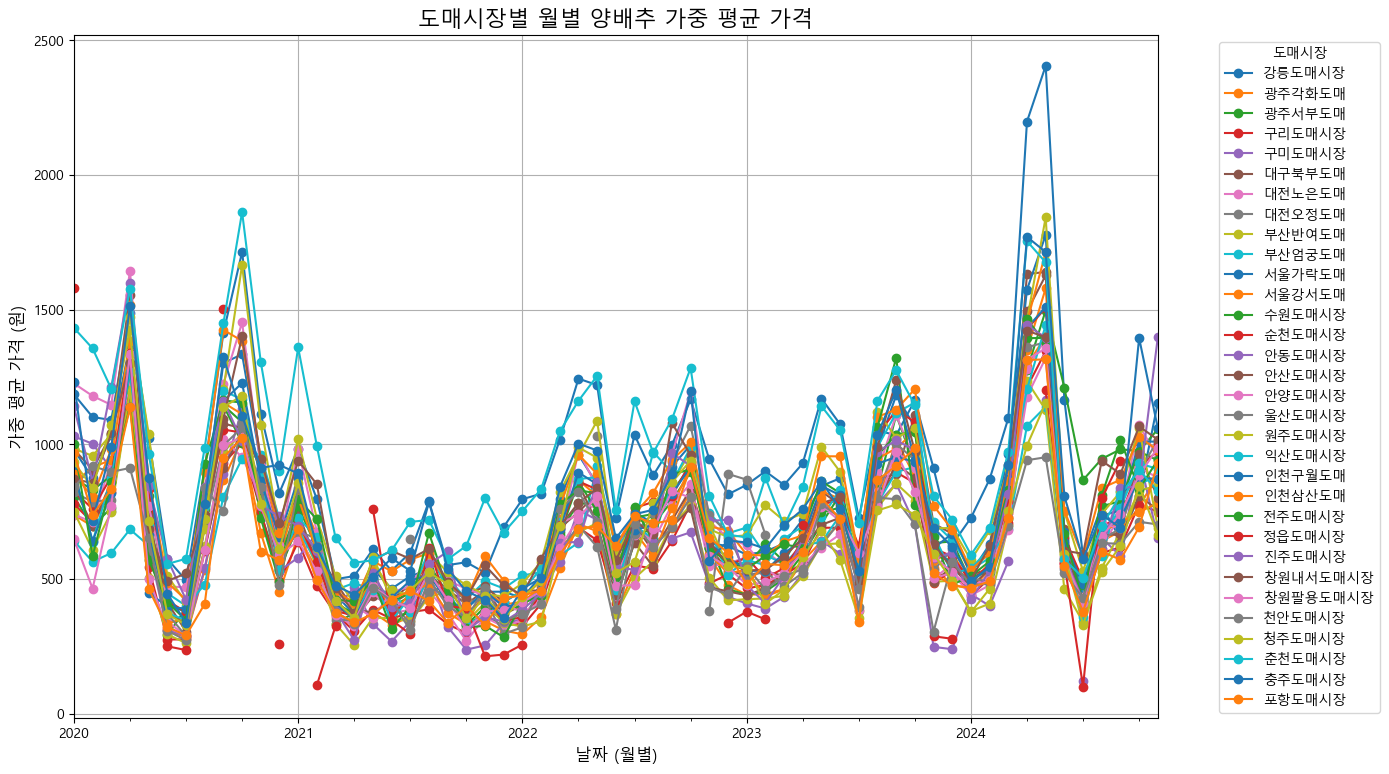

In [11]:
#도매시장별 월별 가격 시각화

import matplotlib.pyplot as plt

#한글
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


cabbage_market_pivot = weighted_avg_market.pivot(index='DATE', columns='도매시장', values='가중_평균가격')

plt.figure(figsize=(14, 8))
cabbage_market_pivot.plot(kind='line', figsize=(14, 8), marker='o')

plt.title('도매시장별 월별 양배추 가중 평균 가격', fontsize=16)
plt.xlabel('날짜 (월별)', fontsize=12)
plt.ylabel('가중 평균 가격 (원)', fontsize=12)
plt.grid(True)
plt.legend(title='도매시장', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [12]:
cabbage_df_cleaned['산지-광역시도'].unique()

array(['충청남도', '전라남도', '강원도', '경상북도', '서울특별시', '전라북도', '경기도', '대구광역시',
       '제주도', '부산광역시', '충청북도', '경상남도', '인천광역시', '울산광역시', '광주광역시', '대전광역시'],
      dtype=object)

<Figure size 1400x800 with 0 Axes>

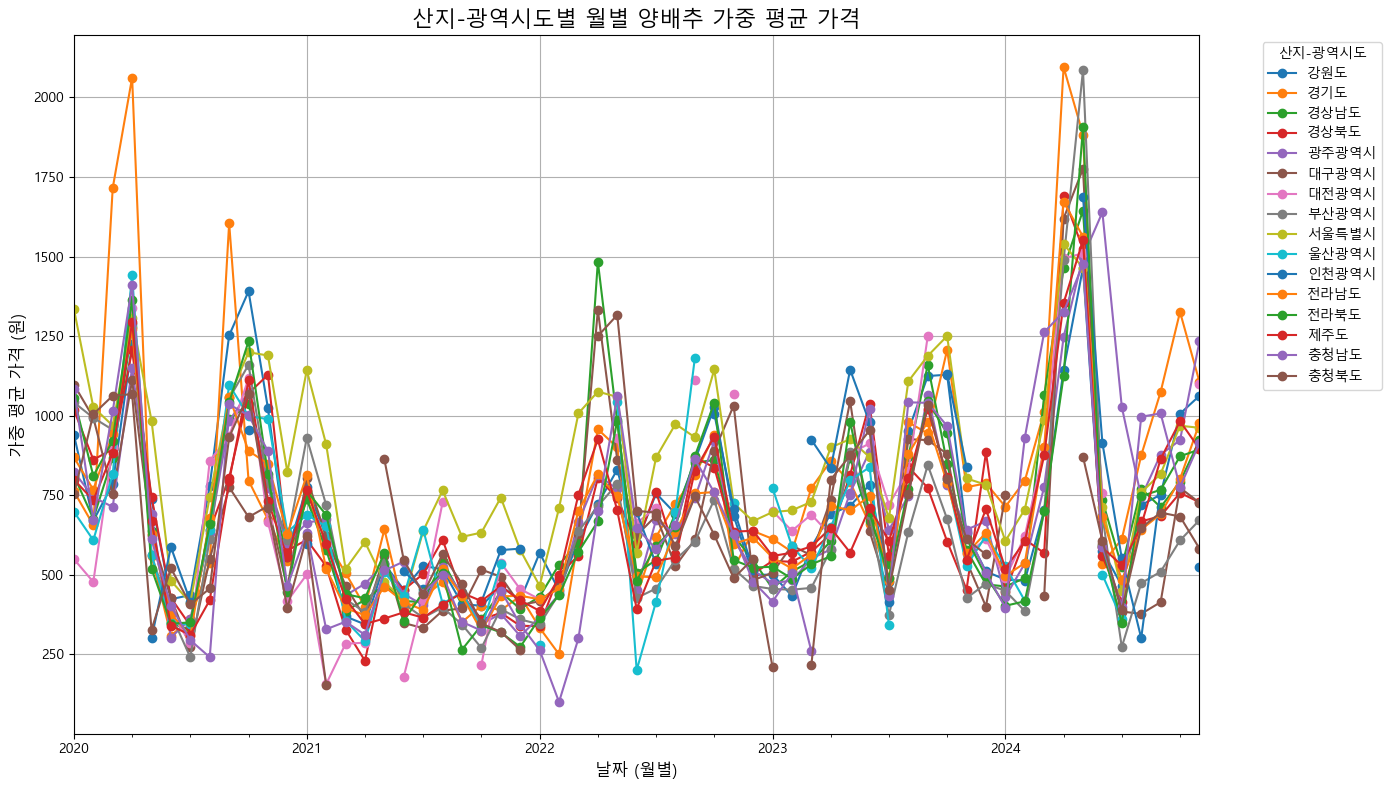

In [13]:
#광역시도별 월별 가격시각화

import matplotlib.pyplot as plt

#한글
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

weighted_avg_ragion = weighted_avg_ragion[weighted_avg_ragion['산지-광역시도'] != '-']

cabbage_ragion_pivot = weighted_avg_ragion.pivot(index='DATE', columns='산지-광역시도', values='가중_평균가격')

plt.figure(figsize=(14, 8))
cabbage_ragion_pivot.plot(kind='line', figsize=(14, 8), marker='o')

plt.title('산지-광역시도별 월별 양배추 가중 평균 가격', fontsize=16)
plt.xlabel('날짜 (월별)', fontsize=12)
plt.ylabel('가중 평균 가격 (원)', fontsize=12)
plt.grid(True)
plt.legend(title='산지-광역시도', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [14]:
# cabbage_df_cleaned.to_csv("data-files/cabbage_df_cleaned.csv", index=False)

In [15]:
# 기후 데이터 가져오기

weather_final = pd.read_csv("data-files/weather_final.csv")

In [16]:
weather_final['DATE'] = pd.to_datetime(weather_final['DATE'], format='%Y-%m')

In [17]:
cabbage_df_cleaned

,DATE,거래단위,총거래금액,도매시장,도매법인,품목,품종,산지-광역시도,산지-시군구,등급,단위_무게(kg),1kg_물량,1kg_평균가격,weighted_price
0,2024-11-01,8kg그물망,2141643700,서울가락도매,대아청과,양배추,양배추(일반),충청남도,서산시,특,8,18105536,946.293421,1.713315e+10
1,2024-11-01,8kg그물망,1892102600,서울가락도매,대아청과,양배추,양배추(일반),전라남도,무안군,특,8,14426304,1049.251478,1.513682e+10
2,2024-11-01,8kg그물망,1110200300,서울가락도매,대아청과,양배추,양배추(일반),강원도,정선군,특,8,7370688,1204.989602,8.881602e+09
3,2024-11-01,8kg그물망,413160300,서울가락도매,대아청과,양배추,양배추(일반),충청남도,태안군,특,8,3366528,981.807488,3.305282e+09
4,2024-11-01,8kg그물망,362517000,서울가락도매,대아청과,양배추,양배추(일반),충청남도,당진시,특,8,3343296,867.448171,2.900136e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21407,2020-02-01,15kg상자,2773000,전주도매시장,전주청과,양배추,양배추(일반),전라북도,전주시,특,15,105750,393.333333,4.159500e+07
21408,2020-02-01,15kg상자,1104000,전주도매시장,전주원협(공),양배추,양배추(일반),전라북도,익산시,특,15,18000,920.000000,1.656000e+07
21411,2020-01-01,15kg상자,263500,강릉도매시장,강릉농산물,양배추,양배추(일반),강원도,정선군,특,15,12150,325.308642,3.952500e+06
21412,2020-01-01,15kg상자,384000,익산도매시장,익산원협(공),양배추,양배추(일반),전라북도,익산시,특,15,9000,640.000000,5.760000e+06


In [18]:
merged_df = cabbage_df_cleaned.merge(
    weather_final,
    left_on=['DATE', '산지-광역시도'],
    right_on=['DATE', '광역시도'],
    how='left'
)

In [19]:
# merged_df.to_csv("data-files/merged_df_1.csv", index = False)

In [20]:
merged_df['DATE'] = merged_df['DATE'].dt.to_period('M').dt.to_timestamp()

In [21]:
merged_df = merged_df.drop(columns=['총거래금액', '산지-시군구', '품목', '품종', '도매법인'])


In [22]:
merged_df = merged_df[~merged_df['DATE'].isin(['2024-11-01'])]

C:\Users\human\AppData\Local\Temp\ipykernel_2944\1813582411.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  merged_df = merged_df[~merged_df['DATE'].isin(['2024-11-01'])]


In [23]:
merged_df

,DATE,거래단위,도매시장,산지-광역시도,등급,단위_무게(kg),1kg_물량,1kg_평균가격,weighted_price,광역시도,평균기온,평균풍속,평균강수량
87,2024-10-01,8kg그물망,서울가락도매,강원도,특,8,22824192,1132.094998,2.583915e+10,강원도,12.93,1.56,130.36
88,2024-10-01,8kg그물망,서울가락도매,충청남도,특,8,10377536,743.505125,7.715751e+09,충청남도,16.32,2.29,92.38
89,2024-10-01,8kg그물망,서울가락도매,강원도,특,8,10340416,1248.230942,1.290723e+10,강원도,12.93,1.56,130.36
90,2024-10-01,8kg그물망,서울가락도매,강원도,특,8,6676480,828.431629,5.531007e+09,강원도,12.93,1.56,130.36
91,2024-10-01,8kg그물망,서울가락도매,강원도,특,8,6619776,990.455145,6.556591e+09,강원도,12.93,1.56,130.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21031,2020-02-01,15kg상자,전주도매시장,전라북도,특,15,105750,393.333333,4.159500e+07,전라북도,2.62,2.15,61.02
21032,2020-02-01,15kg상자,전주도매시장,전라북도,특,15,18000,920.000000,1.656000e+07,전라북도,2.62,2.15,61.02
21033,2020-01-01,15kg상자,강릉도매시장,강원도,특,15,12150,325.308642,3.952500e+06,강원도,-0.79,1.84,89.76
21034,2020-01-01,15kg상자,익산도매시장,전라북도,특,15,9000,640.000000,5.760000e+06,전라북도,2.04,1.94,83.95


In [ ]:
# 각 재배 방식에 대한 파종 시기와 수확 시기 정의
cultivation_periods = {
    "봄재배": {"planting": [3, 4, 5, 6], "harvesting": [6, 7]},
    "가을재배": {"planting": [9, 10], "harvesting": [10, 11]},
    "월동재배": {"planting": [9, 10, 11], "harvesting": [3, 4, 5]},
    "여름재배": {"planting": [6, 7, 8], "harvesting": [9, 10]}
}

# 각 재배 방식에 대한 상관관계 결과를 저장할 딕셔너리
results = {}

for crop, periods in cultivation_periods.items():
    planting_months = periods['planting']  # 파종 시기 월 정의
    harvesting_months = periods['harvesting']  # 수확 시기 월 정의
    
    # 파종 시기 기후 데이터를 연도별로 집계
    planting_climate_data = (
        merged_df[merged_df['DATE'].dt.month.isin(planting_months)]
        .groupby(merged_df['DATE'].dt.year)
        .mean(numeric_only=True)[['평균기온', '평균풍속', '평균강수량']]
        .rename_axis('YEAR')  # 연도를 인덱스로 사용
    )
    
    # 수확 시기 총 거래물량을 연도별로 집계
    harvesting_transaction_data = (
        merged_df[merged_df['DATE'].dt.month.isin(harvesting_months)]
        .groupby(merged_df['DATE'].dt.year)['총거래물량']
        .sum()
        .rename_axis('YEAR')  # 연도를 인덱스로 사용
    )
    
    # 상관관계 분석을 위해 데이터를 병합
    combined_analysis_data = planting_climate_data.merge(
        harvesting_transaction_data,
        left_index=True,
        right_index=True
    )
    
    # 상관관계 계산
    correlation_results = combined_analysis_data.corr().loc['총거래물량'].drop('총거래물량')
    results[crop] = correlation_results  # 결과 저장

# 결과를 하나의 데이터프레임으로 변환하여 표시
correlation_results_df = pd.DataFrame(results).transpose()

In [ ]:
correlation_results_df

,평균기온,평균풍속,평균강수량
봄재배,-0.132670,0.547960,-0.795771
가을재배,-0.609510,0.265443,-0.723971
월동재배,-0.487433,0.473492,-0.648265
여름재배,0.189408,-0.151946,-0.867246


In [ ]:
import pandas as pd
# Dictionary to store correlation results for each cultivation type
results = {}

for crop, periods in cultivation_periods.items():
    planting_months = periods['planting']
    harvesting_months = periods['harvesting']
    
    # Aggregating planting data
    planting_data = (
        merged_df[merged_df['DATE'].dt.month.isin(planting_months)]
        .groupby(merged_df['DATE'].dt.year)
        .mean(numeric_only=True)[['평균가격']]
        .rename_axis('YEAR')
    )
    
    # Aggregating harvesting data
    harvesting_data = (
        merged_df[merged_df['DATE'].dt.month.isin(harvesting_months)]
        .groupby(merged_df['DATE'].dt.year)['총거래물량']
        .sum()
        .rename_axis('YEAR')
    )
    
    # Merging planting and harvesting data
    combined_data = planting_data.merge(
        harvesting_data,
        left_index=True,
        right_index=True
    )
    
    # Calculating correlations
    correlation_results = combined_data.corr().loc['총거래물량'].drop('총거래물량')
    results[crop] = correlation_results

# Converting results into a DataFrame
correlation_results_df = pd.DataFrame(results).transpose()

In [ ]:
correlation_results_df

,평균가격
봄재배,-0.422614
가을재배,-0.401234
월동재배,-0.698121
여름재배,-0.422226


In [ ]:
merged_df

,DATE,거래단위,평균가격,총거래물량,도매시장,산지-광역시도,등급,weighted_price,광역시도,평균기온,평균풍속,평균강수량
0,2024-10-01,10kg그물망,9095.258005,385070.0,구리도매시장,강원도,특,3.502311e+09,강원도,12.93,1.56,130.36
2,2024-10-01,10kg그물망,6569.604190,185190.0,구리도매시장,강원도,특,1.216625e+09,강원도,12.93,1.56,130.36
4,2024-10-01,10kg그물망,6517.980576,114290.0,구리도매시장,강원도,특,7.449400e+08,강원도,12.93,1.56,130.36
5,2024-10-01,10kg그물망,10033.179519,112690.0,인천구월도매,제주도,특,1.130639e+09,제주도,18.36,3.63,194.00
11,2024-10-01,10kg그물망,6822.118789,76270.0,구리도매시장,충청남도,특,5.203230e+08,충청남도,16.32,2.29,92.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16551,2020-01-01,10kg그물망,3066.666667,150.0,광주서부도매,전라남도,특,4.600000e+05,전라남도,4.65,2.77,77.65
16552,2020-01-01,10kg그물망,9500.000000,120.0,창원내서도매시장,서울특별시,특,1.140000e+06,서울특별시,1.85,1.35,55.52
16555,2020-01-01,10kg그물망,10500.000000,60.0,진주도매시장,제주도,특,6.300000e+05,제주도,6.06,3.90,163.16
16558,2020-01-01,10kg그물망,18000.000000,20.0,인천구월도매,전라남도,특,3.600000e+05,전라남도,4.65,2.77,77.65


# 도매시장 데이터 전처리 진행

In [ ]:
# DATE를 datetime 형식으로 변환
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])

# Month 추가: 날짜 열에서 월 정보 추출
merged_df['Month'] = merged_df['DATE'].dt.month

# 각 도매시장의 월별 데이터 개수 확인
monthly_data_availability = merged_df.groupby(['도매시장', 'Month']).size().unstack(fill_value=0)

# 모든 월(1월~12월)에 데이터가 있는 도매시장만 필터링
sufficient_data_markets = monthly_data_availability[monthly_data_availability.min(axis=1) > 0].index

# 충분한 월별 데이터를 가진 도매시장만 포함한 데이터셋 생성
filtered_df = merged_df[merged_df['도매시장'].isin(sufficient_data_markets)]

# 충분한 데이터를 가진 도매시장 수와 총 데이터 개수 확인
market_counts = filtered_df['도매시장'].value_counts()
total_data_count = len(filtered_df)

# 결과 출력
{
    "Total Markets After Filtering": len(sufficient_data_markets),  # 제거 후 남은 도매시장 수
    "Total Data Count After Filtering": total_data_count            # 필터링 후 총 데이터 개수
}



{'Total Markets After Filtering': 26, 'Total Data Count After Filtering': 7249}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# 재배 유형 정의
cultivation_periods = {
    "봄재배": {"planting": [3, 4, 5, 6], "harvesting": [6, 7]},
    "가을재배": {"planting": [9, 10], "harvesting": [10, 11]},
    "월동재배": {"planting": [9, 10, 11], "harvesting": [3, 4, 5]},
    "여름재배": {"planting": [6, 7, 8], "harvesting": [9, 10]}
}

# 각 재배 유형에 대해 파종 및 수확 여부를 나타내는 열 추가
for cultivation, periods in cultivation_periods.items():
    filtered_df[cultivation] = (
        filtered_df['Month'].isin(periods['planting'] + periods['harvesting'])
    ).astype(int)

# '도매시장' 열 원-핫 인코딩 수행
filtered_df = pd.get_dummies(filtered_df, columns=['도매시장'], prefix='Market')

# 피처(feature)와 타겟(target) 선택
features = [
    '총거래물량', '평균기온', '평균풍속', '평균강수량'
] + list(cultivation_periods.keys()) + [col for col in filtered_df.columns if col.startswith('Market_')]
X = filtered_df[features]
y = filtered_df['평균가격']

# 결측값 처리: 결측값이 포함된 행 제거
X = X.dropna()
y = y.loc[X.index]

# 피처 스케일링: 데이터 정규화를 위해 StandardScaler 사용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터를 학습용(80%)과 테스트용(20%)으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


C:\Users\human\AppData\Local\Temp\ipykernel_3972\1003684993.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[cultivation] = (
C:\Users\human\AppData\Local\Temp\ipykernel_3972\1003684993.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[cultivation] = (
C:\Users\human\AppData\Local\Temp\ipykernel_3972\1003684993.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

# 랜덤 포레스트

In [ ]:
# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터를 사용하여 예측 수행
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 모델 성능 평가: 평균제곱오차(MSE)와 결정계수(R²) 계산
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 결과 출력
{
    "Train MSE": train_mse,
    "Train MAE": train_mae,
    "Train R²": train_r2,
    "Test MSE": test_mse,
    "Test MAE": test_mae,
    "Test R²": test_r2,
    
}

{'Train MSE': np.float64(1772613.109995483),
 'Train MAE': np.float64(913.3858434394128),
 'Train R²': 0.8081773415526159,
 'Test MSE': np.float64(6444398.161567346),
 'Test MAE': np.float64(1896.3655172866368),
 'Test R²': 0.2752778878529234}

# 랜덤포레스트 하이퍼파라미터

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 랜덤 포레스트 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],  # 트리의 개수
    'max_depth': [5, 10, 15, 20, 30, None],        # 트리의 최대 깊이
    'max_features': ['sqrt', 'log2', None] # 사용 피처 수
}

# 랜덤 포레스트 모델 초기화
rf_model = RandomForestRegressor(random_state=42)

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='r2',    # 결정계수(R²)를 평가 지표로 사용
    cv=5,            # 5-fold 교차 검증
    verbose=2,       # 진행 상황 출력
    n_jobs=-1        # 가능한 모든 CPU 코어 사용
)

# 데이터 학습 및 교차 검증
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 점수 확인
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# 최적의 하이퍼파라미터를 사용하여 모델 재학습
optimized_rf_model = RandomForestRegressor(
    **best_params,  # 최적 파라미터 적용
    random_state=42
)

optimized_rf_model.fit(X_train, y_train)

# 모델 성능 평가
y_train_pred = optimized_rf_model.predict(X_train)
y_test_pred = optimized_rf_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

{
    "Best Parameters": best_params,
    "Best Cross-Validation Score": best_score,
    "Train MSE": train_mse,
    "Train R²": train_r2,
    "Test MSE": test_mse,
    "Test R²": test_r2
}


Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'Best Parameters': {'max_depth': 20,
  'max_features': None,
  'n_estimators': 200},
 'Best Cross-Validation Score': np.float64(0.5133263958036658),
 'Train MSE': np.float64(807222.99639643),
 'Train R²': 0.9125750970838086,
 'Test MSE': np.float64(4300426.133810502),
 'Test R²': 0.5182092357537325}

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost 하이퍼파라미터 그리드 설정
param_grid_xgb = {
    'n_estimators': [50, 100, 200],  # 부스팅 라운드 수
    'max_depth': [3, 5, 7],          # 트리의 최대 깊이
    'learning_rate': [0.01, 0.05,  0.1, 0.2],  # 학습률
    'subsample': [0.5, 0.6, 0.8, 1.0],    # 데이터 샘플링 비율
    'gamma' : [0, 1, 5, 10]
}

# XGBoost 모델 초기화
xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')

# GridSearchCV 설정
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring='r2',  # 결정계수(R²)를 평가 지표로 사용
    cv=5,          # 5-fold 교차 검증
    verbose=2,     # 진행 상황 출력
    n_jobs=-1      # 가능한 모든 CPU 코어 사용
)

# 데이터 학습 및 교차 검증
grid_search_xgb.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 점수 확인
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

# 최적의 하이퍼파라미터를 사용하여 모델 재학습
optimized_xgb_model = XGBRegressor(
    **best_params_xgb,
    random_state=42,
    objective='reg:squarederror'
)

optimized_xgb_model.fit(X_train, y_train)

# 모델 성능 평가
y_train_pred_xgb = optimized_xgb_model.predict(X_train)
y_test_pred_xgb = optimized_xgb_model.predict(X_test)

train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

{
    "Best Parameters": best_params_xgb,
    "Best Cross-Validation Score": best_score_xgb,
    "Train MSE": train_mse_xgb,
    "Train R²": train_r2_xgb,
    "Test MSE": test_mse_xgb,
    "Test R²": test_r2_xgb
}


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


c:\Users\human\anaconda3\envs\human-da-env\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'Best Parameters': {'gamma': 0,
  'learning_rate': 0.1,
  'max_depth': 7,
  'n_estimators': 200,
  'subsample': 0.8},
 'Best Cross-Validation Score': np.float64(0.5271165187773513),
 'Train MSE': np.float64(1087094.4206414367),
 'Train R²': 0.8822641022250598,
 'Test MSE': np.float64(4437724.725212352),
 'Test R²': 0.5028272268031868}

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import pandas as pd

# 데이터 로드 및 전처리
data['DATE'] = pd.to_datetime(data['DATE'])  # 날짜 형식 변환
data = data.sort_values('DATE')  # 날짜 기준 정렬

# 외생변수와 타겟 변수 선택
target = '평균가격'
exogenous = ['평균기온', '평균풍속', '평균강수량', '총거래물량']

# 결측치 처리
for col in exogenous:
    data[col] = data[col].fillna(data[col].mean())

# 학습 및 테스트 데이터 분리 (80% 학습, 20% 테스트)
train_data = data[:int(len(data) * 0.8)]
test_data = data[int(len(data) * 0.8):]

y_train = train_data[target]
y_test = test_data[target]
X_train = train_data[exogenous]
X_test = test_data[exogenous]

# SARIMAX 모델 정의 및 학습
model = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# 테스트 데이터에 대해 예측
forecast = results.forecast(steps=len(test_data), exog=X_test)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(train_data['DATE'], y_train, label='Train')
plt.plot(test_data['DATE'], y_test, label='Test', color='orange')
plt.plot(test_data['DATE'], forecast, label='Forecast', color='green')
plt.legend()
plt.title('SARIMAX Model with Exogenous Variables')
plt.show()

# 모델 평가
mae = mean_absolute_error(y_test, forecast)
print(f'Mean Absolute Error (MAE): {mae:.2f}')



In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import pandas as pd

# 데이터 로드 및 전처리
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])  # 날짜 형식 변환
data = merged_df.sort_values('DATE')  # 날짜 기준 정렬

# 시장별 데이터 그룹화
markets = data['도매시장'].unique()  # 시장 목록
results_summary = []

for market in markets:
    print(f"Processing market: {market}")
    
    # 시장별 데이터 필터링
    market_data = data[data['도매시장'] == market]
    
    # 외생 변수와 타겟 변수 설정
    target = '평균가격'
    exogenous = ['평균기온', '평균풍속', '평균강수량', '총거래물량']

    # 결측치 처리
    for col in exogenous:
        market_data[col] = market_data[col].fillna(market_data[col].mean())
    
    # 데이터 분리 (80% 학습, 20% 테스트)
    train_data = market_data[:int(len(market_data) * 0.8)]
    test_data = market_data[int(len(market_data) * 0.8):]

    y_train = train_data[target]
    y_test = test_data[target]
    X_train = train_data[exogenous]
    X_test = test_data[exogenous]

    # SARIMAX 모델 정의 및 학습
    model = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit(disp=False)

    # 테스트 데이터에 대해 예측
    forecast = results.forecast(steps=len(test_data), exog=X_test)

    # 모델 평가
    mae = mean_absolute_error(y_test, forecast)
    print(f"Market: {market}, Mean Absolute Error (MAE): {mae:.2f}")

    # 결과 저장
    results_summary.append({'Market': market, 'MAE': mae})


In [ ]:
import pandas as pd
results_df = pd.DataFrame(results_summary)
print(results_df)

In [ ]:
import pandas as pd

# 1. 날짜 데이터 처리
filtered_df['DATE'] = pd.to_datetime(filtered_df['DATE'])
filtered_df['Month'] = filtered_df['DATE'].dt.month

# 2. 파종-수확 연결: 파종 시기별 재배 유형 정의
cultivation_periods = {
    "봄재배": {"planting": [3, 4, 5], "harvesting": [6, 7]},
    "가을재배": {"planting": [9, 10], "harvesting": [10, 11]},
    "월동재배": {"planting": [9, 10, 11], "harvesting": [3, 4, 5]},
    "여름재배": {"planting": [6, 7], "harvesting": [8, 9]}
}

# 3. 파종 시기의 기후 데이터 연결
for cultivation, periods in cultivation_periods.items():
    # 파종 시기의 기후 평균값을 계산
    planting_mask = filtered_df['Month'].isin(periods['planting'])
    filtered_df[f'{cultivation}_파종_평균기온'] = (
        filtered_df.loc[planting_mask, '평균기온']
        .shift(3)  # 수확 시기에 매핑: 3개월 지연 예시
    )
    filtered_df[f'{cultivation}_파종_평균강수량'] = (
        filtered_df.loc[planting_mask, '평균강수량']
        .shift(3)  # 수확 시기에 매핑
    )

# 4. 수확 시기의 총거래물량 포함
for cultivation, periods in cultivation_periods.items():
    harvesting_mask = filtered_df['Month'].isin(periods['harvesting'])
    filtered_df[f'{cultivation}_수확_총거래물량'] = filtered_df.loc[harvesting_mask, '총거래물량']

# 5. 결측값 처리 (결측값은 파종-수확 연결 과정에서 발생할 수 있음)
filtered_df.fillna(0, inplace=True)

# 6. 새로운 피처와 타겟 변수 설정
features = [col for col in filtered_df.columns if '_파종_' in col or '_수확_' in col]
target = '평균가격'

X = filtered_df[features]
y = filtered_df[target]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤포레스트 모델 학습
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 훈련 데이터 성능 평가
y_train_pred = rf_model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

# 테스트 데이터 성능 평가
y_test_pred = rf_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# 결과 출력
print(train_mae, train_r2, train_mse)
print(test_mae, test_r2, train_mse)


913.3858434394128 0.8081773415526159 1772613.109995483
1896.3655172866368 0.2752778878529234 1772613.109995483


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'max_depth': [10, 20, None],      # 최대 깊이
    'min_samples_split': [2, 5, 10],  # 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]     # 리프 노드의 최소 샘플 수
}

# 랜덤포레스트 모델 정의
rf_model = RandomForestRegressor(random_state=42)

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid, 
    cv=3,  # 3-fold 교차 검증
    scoring='neg_mean_absolute_error',  # MAE 기준으로 평가
    n_jobs=-1,  # 모든 CPU 코어 사용
    verbose=2
)

# Grid Search 실행
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터와 성능 출력
print("Best Parameters:", grid_search.best_params_)
print("Best MAE:", -grid_search.best_score_)

# 최적 모델로 예측
best_rf_model = grid_search.best_estimator_
y_test_pred = best_rf_model.predict(X_test)

# 테스트 데이터 성능 평가
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MAE: {test_mae:.2f}")
print(f"Test R2: {test_r2:.2f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best MAE: 1761.6505010612361
Test MAE: 1769.57
Test R2: 0.38


In [ ]:
mape = (abs(y_test - y_test_pred) / y_test).mean() * 100
print(f"Test MAPE: {mape:.2f}%")

Test MAPE: 37.97%
